In [1]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [2]:
# load the dataset
Data_folder_path = "C:/Users/geofr/Desktop/Research/Data/FE/PUND/Python/"

dset = analysis.load_Dataset(Data_folder_path + r'BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv
2,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,2,fe_PUND_PV__2.csv
3,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,3,fe_PUND_PV__3.csv
4,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,4,fe_PUND_PV__4.csv
5,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,5,fe_PUND_PV__5.csv
6,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,6,fe_PUND_PV__6.csv
7,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,7,fe_PUND_PV__7.csv
8,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,8,fe_PUND_PV__8.csv
9,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,9,fe_PUND_PV__9.csv


In [23]:
data2= dset.select_index(13).get_data()
data2

{0: {'data': {'time_c': array([-1.19531250e-03, -1.14411250e-03, -1.09291250e-03, -1.04171250e-03,
       -9.90512500e-04, -9.39312500e-04, -8.88112500e-04, -8.36912500e-04,
       -7.85712500e-04, -7.34512500e-04, -6.83312500e-04, -6.32112500e-04,
       -5.80912500e-04, -5.29712500e-04, -4.78512500e-04, -4.27312500e-04,
       -3.76112500e-04, -3.24912500e-04, -2.73712500e-04, -2.22512500e-04,
       -1.71312500e-04, -1.20112500e-04, -6.89125000e-05, -1.77125000e-05,
        3.34875000e-05,  8.46875000e-05,  1.35887500e-04,  1.87087500e-04,
        2.38287500e-04,  2.89487500e-04,  3.40687500e-04,  3.91887500e-04,
        4.43087500e-04,  4.94287500e-04,  5.45487500e-04,  5.96687500e-04,
        6.47887500e-04,  6.99087500e-04,  7.50287500e-04,  8.01487500e-04,
        8.52687500e-04,  9.03887500e-04,  9.55087500e-04,  1.00628750e-03,
        1.05748750e-03,  1.10868750e-03,  1.15988750e-03,  1.21108750e-03,
        1.26228750e-03,  1.31348750e-03,  1.36468750e-03,  1.41588750e-03,
 

(<Figure size 640x480 with 1 Axes>, <Axes: >)

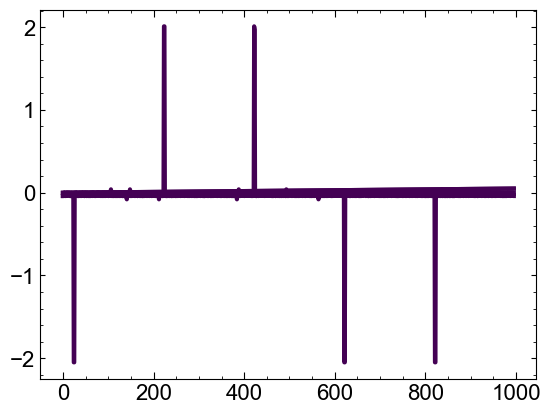

In [24]:
data2.plot()

In [26]:
data3 = dset.query("trial == 12")
data3

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.01,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,12,fe_PUND_PV__12.csv


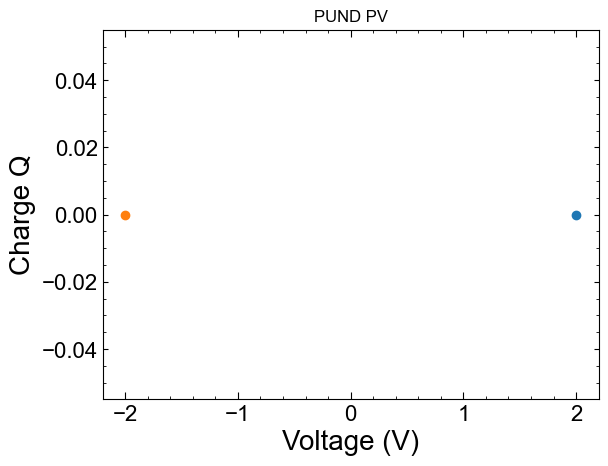

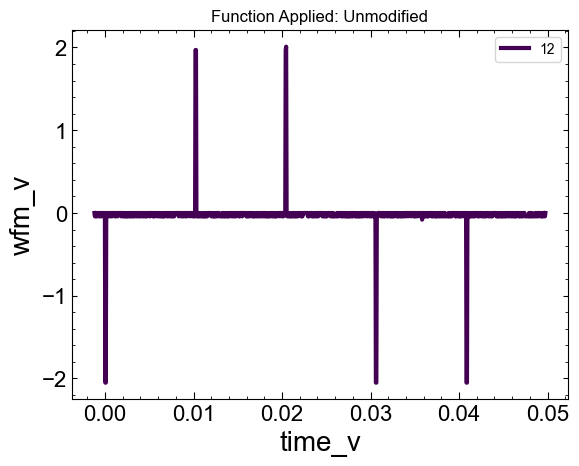

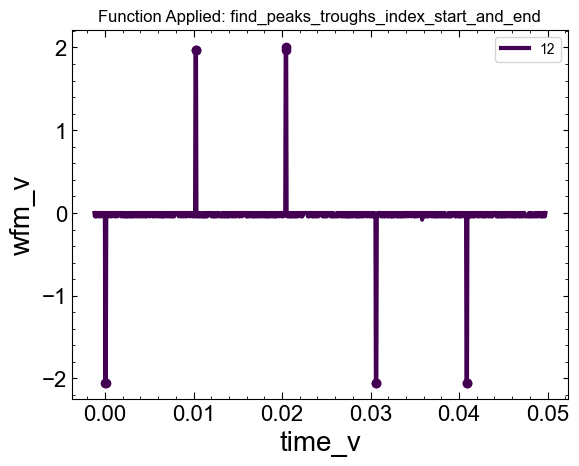

In [27]:
modified_data, interm_steps = use_analysis_file('analysisfile', data3, verbose=True, dont_pass_defn=False)

In [20]:
modified_data.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c', 'calc_vals']

In [21]:
modified_data.calc_vals

{0: array([-1.20603003e-07, -9.64824021e-07, -2.41206005e-07, -3.61809008e-07]),
 1: array([-1.20603003e-06, -1.32663303e-06,  2.41206005e-07, -1.56783903e-06]),
 2: array([6.03015013e-07, 2.41206005e-07, 7.23618016e-07, 0.00000000e+00]),
 3: array([2.41206005e-07, 1.20603003e-06, 6.03015013e-07, 1.20603003e-07]),
 4: array([0., 0., 0., 0.]),
 5: array([0., 0., 0., 0.]),
 6: array([0., 0., 0., 0.]),
 7: array([0., 0., 0., 0.]),
 8: array([0., 0., 0., 0.]),
 9: array([0., 0., 0., 0.]),
 10: array([0., 0., 0., 0.]),
 11: array([0., 0., 0., 0.])}

(<Figure size 640x480 with 1 Axes>, <Axes: >)

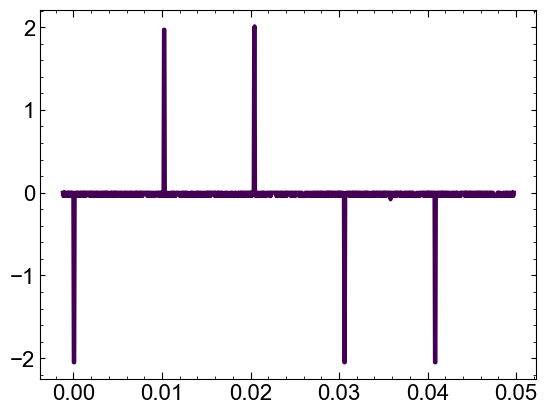

In [31]:
indices = np.linspace()
interm_steps['data3'].plot(x='time_v', y='wfm_v', subset=indices)